In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

In [310]:
df = pd.read_csv(r'C:\Users\orenf\Downloads\heartdisease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [311]:
df.shape

(4238, 16)

In [312]:
df.columns


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [314]:
df.dtypes


male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [315]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [316]:
df['education'].fillna(df['education'].mean(), inplace = True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace = True)
df['BPMeds'].fillna(df['BPMeds'].mean(), inplace = True)
df['totChol'].fillna(df['totChol'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace = True)
df['glucose'].fillna(df['glucose'].mean(), inplace = True)

In [317]:
df.describe()
df.round()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,27.0,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,29.0,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,128.0,80.0,25.0,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,29.0,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.0,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,26.0,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.0,80.0,20.0,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.0,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.0,87.0,19.0,86.0,82.0,0


In [318]:

df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [319]:
cols = ['education']
df = df.drop(cols, axis = 1)

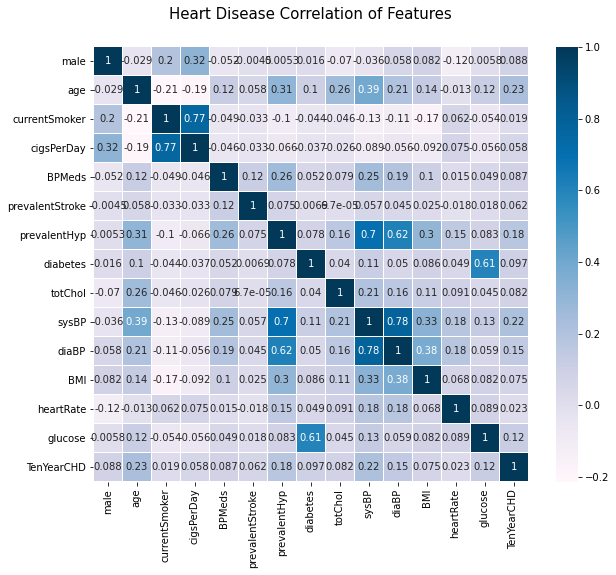

In [320]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Heart Disease Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

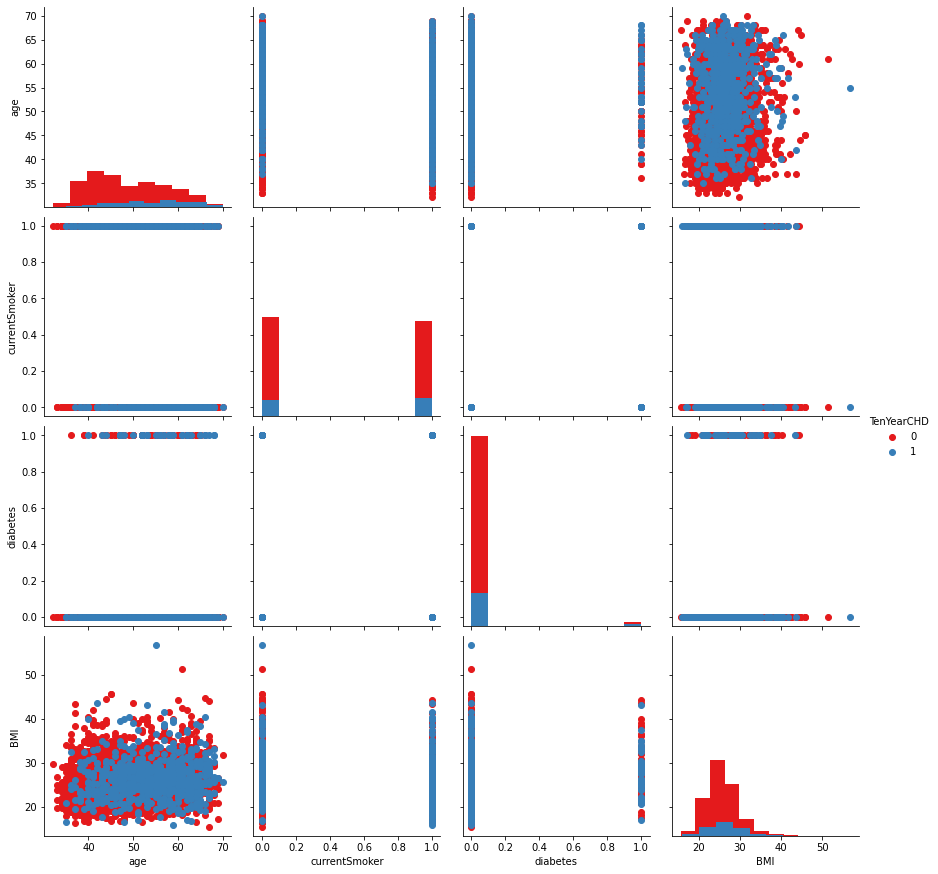

In [321]:
x = sns.PairGrid(data=df, vars=['age', 'currentSmoker', 'diabetes', 'BMI'], hue='TenYearCHD', height=3, palette='Set1')
x.map_diag(plt.hist)
x.map_offdiag(plt.scatter)
x.add_legend();

In [322]:
dfTest = df

In [323]:
X = dfTest.drop('TenYearCHD', axis=1).values
y = dfTest['TenYearCHD'].values
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(4238, 14)
(4238, 1)


In [324]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = scaler.transform(X)

In [340]:
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [342]:
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), kernel_initializer='he_normal', activation='relu'))
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [343]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])

In [344]:
model.fit(X_train, y_train, epochs=200, batch_size=250, verbose=0)

In [345]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy)

44/44 [==============================] - 0s 765us/step - loss: 0.3719 - binary_accuracy: 0.8570
[0.37190085649490356, 0.8570407629013062]


In [346]:
model2 = Sequential()
model2.add(Dense(10, input_shape=(X_train.shape[1],), kernel_initializer='he_normal', activation='relu'))
model2.add(Dense(7, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(1, activation='sigmoid'))

In [347]:
model2.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.BinaryAccuracy()])

In [348]:
model2.fit(X_train, y_train, epochs=150, batch_size=250, verbose=0)
print(":)")

:)


In [349]:
accuracy = model.evaluate(X_test, y_test)
print(accuracy)

44/44 [==============================] - 0s 696us/step - loss: 0.3719 - binary_accuracy: 0.8570
[0.37190085649490356, 0.8570407629013062]


In [350]:
y_pred = model.predict(X_test)

In [351]:
r2_score(y_test, y_pred)

0.10368850463567703